# What should the model be?

We know that the population at the next time step be? Assume each rabbit multiplies with rate $r$. Then we can try 
$$x_{n + 1} = rx_{n}$$

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, widgets

In [6]:
def proposed_model(r, x):
    #return r*x
    return r * x * (1 - x)
    
def plot_model(x, r):
    num_iterations = 100
    values = np.zeros(num_iterations)
    values [0] = x
    for i in range(1, num_iterations):
        values[i] = proposed_model(r, values[i - 1])
    
    plt.plot(np.arange(num_iterations), values, '*')
    plt.title('Proposed Model')
    plt.xlabel('n')
    plt.ylabel('$x_n$')
    #plt.ylim(0, 1)
    plt.grid(True)
    plt.show()
    
    
#slider = widgets.FloatSlider(value=0, min=0, max=10, step=1, description='Initial population')
slider = widgets.FloatSlider(value=0, min=0, max=1, step=0.1, description='Initial population')

def update_plot(x):
    plot_model(x, r = 3.1)
    
interact(update_plot, x =slider)

interactive(children=(FloatSlider(value=0.0, description='Initial population', max=1.0), Output()), _dom_class…

<function __main__.update_plot(x)>

# Chaos from the logistic map

The function we are considering is:
$$f(x) = rx ( 1- x) \text{ on the interval }[0, 1]$$

Below is a plot of it for different values of $r$.

In [7]:


def logistic_map(r, x):
    return r * x * (1 - x)

def plot_logistic_map(r):
    # Parameters
    x = np.linspace(0, 1, 1000)
    
    # Initialize plot
    plt.figure(figsize=(8, 6))
    
    # Plot logistic map
    plt.plot(x, logistic_map(r, x))
    plt.plot(x, x)
    # Customize plot
    plt.title('Logistic Map')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.ylim(0, 1)
    plt.grid(True)
    plt.show()

# Create interactive slider
slider = widgets.FloatSlider(value=2.5, min=0, max=4, step=0.1, description='Growth Rate r')

# Define the update function for the slider
def update_plot(r):
    plot_logistic_map(r)

# Connect the slider to the update function
interact(update_plot, r=slider)

# Display the initial plot
#plot_logistic_map(slider.value)


interactive(children=(FloatSlider(value=2.5, description='Growth Rate r', max=4.0), Output()), _dom_classes=('…

<function __main__.update_plot(r)>

## Cobweb plots 

In [8]:
def plot_logistic_map(r, x0, num_iterations):
    # Initialize plot
    plt.figure(figsize=(12, 6))
    
    # Plot logistic map curve
    x = np.linspace(0, 1, 1000)
    plt.plot(x, logistic_map(r, x), 'b-', label='Logistic Map')

    # Plot y=x line
    plt.plot([0, 1], [0, 1], 'r--', label='y=x')

    # Plot cobweb
    x = x0
    for _ in range(num_iterations):
        y = logistic_map(r, x)
        plt.plot([x, x], [x, y], 'g-', linewidth=1)  # Vertical line
        plt.plot([x, y], [y, y], 'g-', linewidth=1)  # Horizontal line
        x = y

    # Customize plot
    plt.title('Logistic Map with Cobweb Plot')
    plt.xlabel('Population (x)')
    plt.ylabel('Next Population')
    plt.legend()
    plt.grid(True)
    plt.show()

# Create interactive sliders
slider_r = widgets.FloatSlider(value=2.5, min=0, max=4, step=0.01, description='Growth Rate')
slider_x0 = widgets.FloatSlider(value=0.2, min=0, max=1, step=0.01, description='Initial Population')
slider_iterations = widgets.IntSlider(value=10, min=1, max=100, step=1, description='Iterations')

# Define the update function for the sliders
def update_plot(r, x0, num_iterations):
    plot_logistic_map(r, x0, num_iterations)

# Connect the sliders to the update function
interact(update_plot, r=slider_r, x0=slider_x0, num_iterations=slider_iterations)

# Display the initial plot
#plot_logistic_map(slider_r.value, slider_x0.value, slider_iterations.value)



interactive(children=(FloatSlider(value=2.5, description='Growth Rate', max=4.0, step=0.01), FloatSlider(value…

<function __main__.update_plot(r, x0, num_iterations)>

## Iterations of the map

In [9]:
def plot_logistic_map_iterations(r, x0, num_iterations):
    # Initialize plot
    plt.figure(figsize=(12, 6))
    
    # Plot iterations
    values = np.zeros(num_iterations)
    values[0] = x0
    for i in range(1, num_iterations):
        values[i] = logistic_map(r, values[i - 1])
        
    plt.plot(np.arange(0, num_iterations), values, 'b*')
    plt.plot(np.arange(0, num_iterations), values, 'b')


    # Customize plot
    plt.title(f'Logistic Map - First {num_iterations} Iterations')
    plt.xlabel('Population (x)')
    plt.ylabel('Next Population')
    plt.grid(True)
    plt.show()

# Create interactive slider for growth rate (r)
slider_r = widgets.FloatSlider(value=2.5, min=0, max=4, step=0.01, description='Growth Rate')

# Create interactive slider for initial conditions
slider_x0 = widgets.FloatSlider(value=0.2, min=0, max=1, step=0.01, description='Initial Population')

# Define the update function for the sliders
def update_plot(r, x0):
    plot_logistic_map_iterations(r, x0, num_iterations=50)

# Connect the sliders to the update function
interact(update_plot, r=slider_r, x0=slider_x0)

# Display the initial plot
# plot_logistic_map_iterations(slider_r.value, slider_x0.value, num_iterations=100)

interactive(children=(FloatSlider(value=2.5, description='Growth Rate', max=4.0, step=0.01), FloatSlider(value…

<function __main__.update_plot(r, x0)>

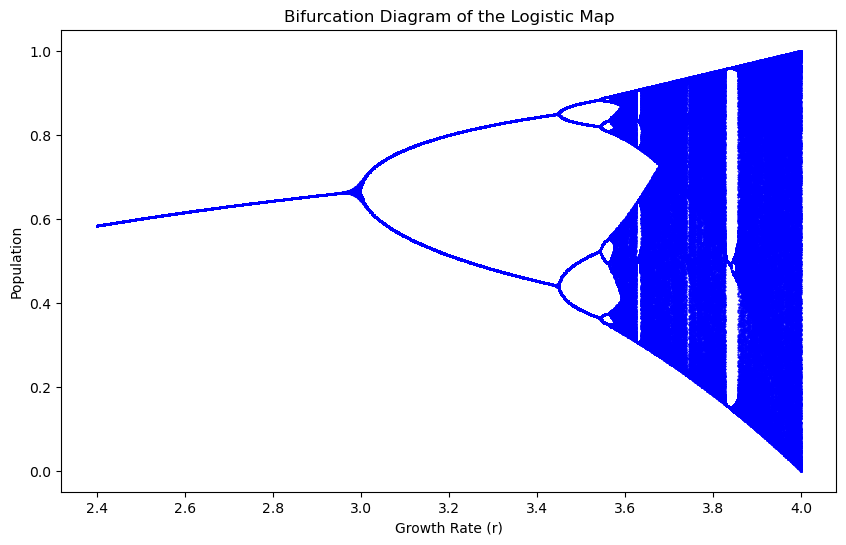

In [4]:


def plot_bifurcation_diagram(r_values, x0, num_iterations_per_point, skip_iterations=100):
    plt.figure(figsize=(10, 6))

    for r in r_values:
        x = x0
        for _ in range(skip_iterations):
            x = r * x * (1 - x)
        
        x_values = []
        for _ in range(num_iterations_per_point):
            x = r * x * (1 - x)
            x_values.append(x)
        
        plt.plot([r] * len(x_values), x_values, 'b.', markersize=1)

    plt.title('Bifurcation Diagram of the Logistic Map')
    plt.xlabel('Growth Rate (r)')
    plt.ylabel('Population')
    ax = plt.gca()
    #ax.set_xlim(3.5, 4)
    #ax.set_ylim(0.7, 1)
    plt.show()

# Specify the range of growth rates (r values) and other parameters
r_values = np.linspace(2.4, 4.0, 1000)  # Adjust the range as needed
x0 = 0.2
num_iterations_per_point = 1000

# Generate and plot the bifurcation diagram
plot_bifurcation_diagram(r_values, x0, num_iterations_per_point)


Here we plot the second and third iteration of the map 

In [80]:
def plot_logistic_map_2(r):
    # Parameters
    x = np.linspace(0, 1, 1000)
    
    # Initialize plot
    plt.figure(figsize=(8, 6))
    
    # Plot logistic map
    plt.plot(x, logistic_map(r, logistic_map(r, logistic_map(r, x))), label = '$y = f^{(2)}$')
    plt.plot(x, x, 'r', label = "y = x")
    # Customize plot
    plt.title('$f(f(x))$')
    plt.xlabel('x')
    plt.ylim(0, 1)
    plt.grid(True)
    plt.legend()
    plt.show()

# Create interactive slider
slider = widgets.FloatSlider(value=2.5, min=0, max=4, step=0.1, description='Growth Rate r')

# Define the update function for the slider
def update_plot(r):
    plot_logistic_map_2(r)

# Connect the slider to the update function
interact(update_plot, r=slider)

# Display the initial plot
#plot_logistic_map(slider.value)


interactive(children=(FloatSlider(value=2.5, description='Growth Rate r', max=4.0), Output()), _dom_classes=('…

<function __main__.update_plot(r)>

In [45]:
def formula_two_cycle(r):
    return [0, (r - 1)/r, (r - 1 + np.sqrt((r - 3)*(r + 1)/(2*r))),(r - 1 - np.sqrt((r - 3)*(r + 1)/(2*r))) ]

In [47]:
formula_two_cycle(3.1)

[0, 0.6774193548387097, 2.357155657643507, 1.842844342356493]

# Characteristics of chaos
Here we fix r = 3.57 and plot the trajectories from two different intial conditions

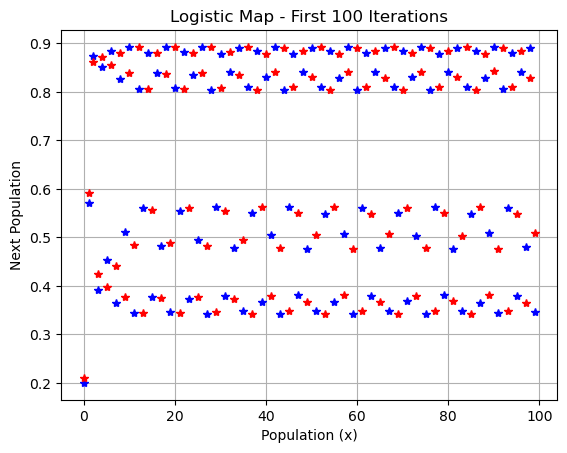

In [72]:
    # Plot iterations
    num_iterations = 100
    values = np.zeros(num_iterations)
    values[0] = 0.2
    for i in range(1, num_iterations):
        values[i] = logistic_map(3.57, values[i - 1])
        
    plt.plot(np.arange(0, num_iterations), values, 'b*')
    #plt.plot(np.arange(0, num_iterations), values, 'b')


    # Customize plot
    plt.title(f'Logistic Map - First {num_iterations} Iterations')
    plt.xlabel('Population (x)')
    plt.ylabel('Next Population')
    plt.grid(True)
    
    values = np.zeros(num_iterations)
    values[0] = 0.21
    for i in range(1, num_iterations):
        values[i] = logistic_map(3.57, values[i - 1])
        
    plt.plot(np.arange(0, num_iterations), values, 'r*')
    #plt.plot(np.arange(0, num_iterations), values, 'r')

    
 

In [52]:
logistic_map(2, 2)

-4